In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
data=load_iris()

sepal_petal=pd.DataFrame(data.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
y=pd.DataFrame(data.target, columns=['Species'])
df=pd.concat([sepal_petal,y], axis=1)
sepal_length=(pd.DataFrame(df['sepal_length']))
petal_length=(pd.DataFrame(df['petal_length']))
sepal_petal=pd.concat([sepal_length,petal_length], axis=1)
sepal_petal_species=pd.concat([sepal_petal,y], axis=1)
sepal_petal_species=sepal_petal_species[['sepal_length', 'petal_length', 'Species']][sepal_petal_species['Species'] != 0]
sepal_petal_species

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [57]:
# Let's see how many examples we have of each species
df["Species"].value_counts()
# 0 - Iris-setosa
# 1 - 
# 2 - 

Species
0    50
1    50
2    50
Name: count, dtype: int64

# Analyzing data
First, let's analyze the data. As we did in the Week 3 assignment, we will look at the scatter plot matrix and see the relationships between features.

As a refresher, take a look at scatter plots, box plots, and violin plots of your data in a visual way of your choice.

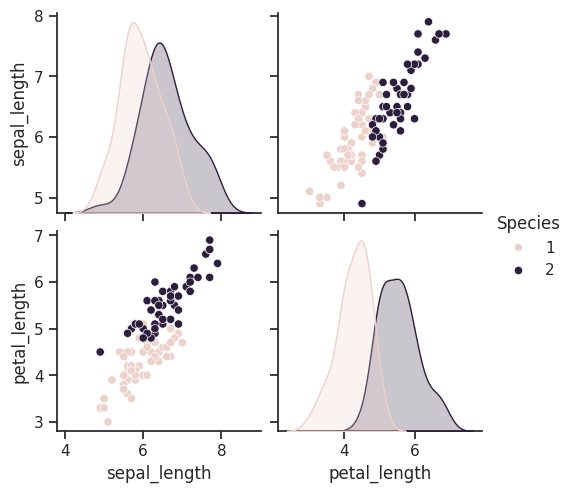

In [58]:
sns.set_theme(style="ticks")
sns.pairplot(sepal_petal_species, hue="Species")

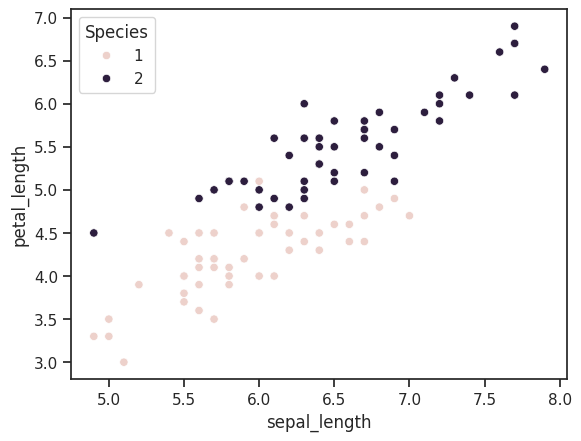

In [59]:
sns.scatterplot(x='sepal_length', y='petal_length', data=sepal_petal_species, hue="Species")
sns.set()

<Axes: xlabel='Species', ylabel='petal_length'>

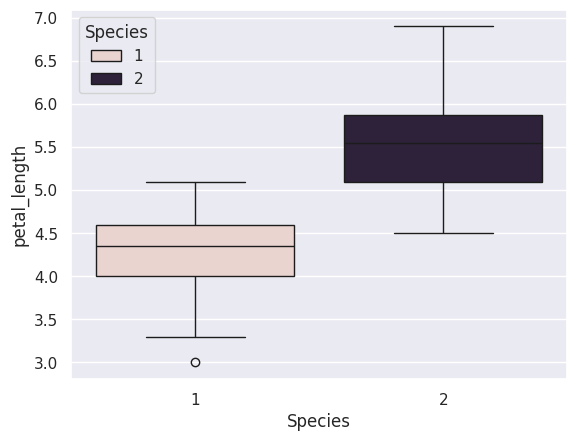

In [60]:
sns.boxplot(data=sepal_petal_species, x="Species", y="petal_length", hue="Species")


<Axes: xlabel='Species', ylabel='sepal_length'>

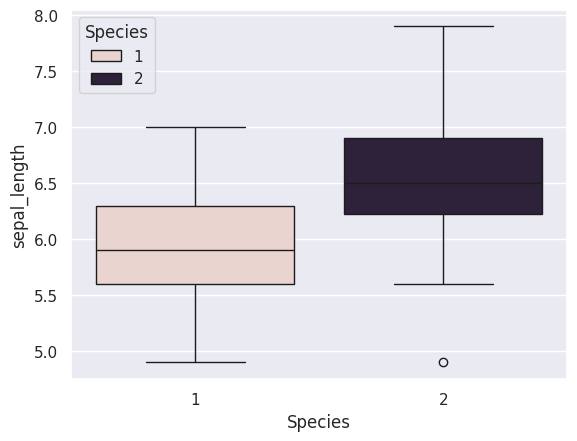

In [61]:
sns.boxplot(data=sepal_petal_species, x="Species", y="sepal_length", hue="Species")


<Axes: xlabel='Species', ylabel='sepal_length'>

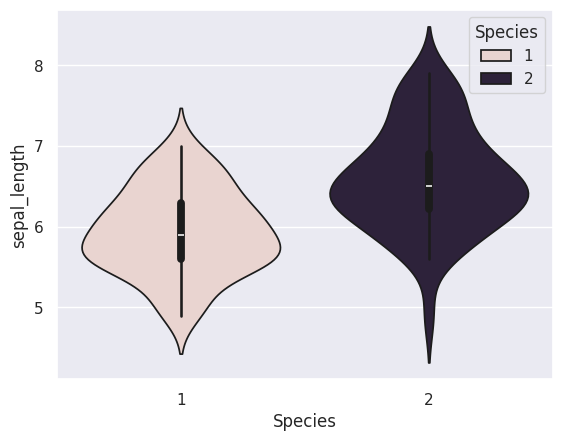

In [62]:
sns.violinplot(data=sepal_petal_species, x="Species", y="sepal_length", hue="Species")


<Axes: xlabel='Species', ylabel='petal_length'>

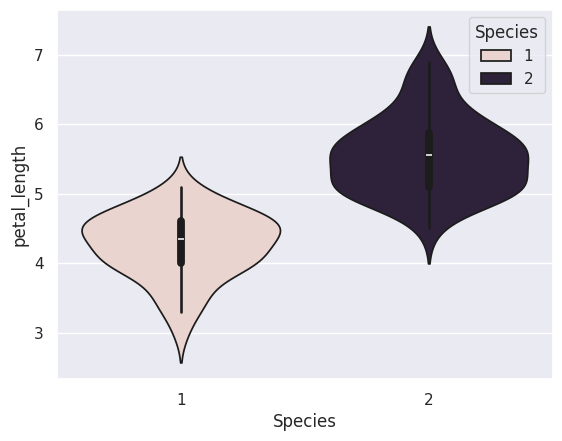

In [63]:
sns.violinplot(data=sepal_petal_species, x="Species", y="petal_length", hue="Species")


Based on the results of the data analysis, we perform the necessary preprocessing. Preprocessing includes feature engineering and missing value imputation. It is also important to check for outliers.

In [64]:
print(sepal_petal_species.isnull().sum())

sepal_length    0
petal_length    0
Species         0
dtype: int64


In [65]:
# Ver outliers

# pretreatment

Process the data appropriately. Data quality is very important for getting good results with machine learning.



In [66]:
from sklearn.model_selection import train_test_split

subset = sepal_petal_species.loc[(sepal_petal_species['Species'] == 1)|(sepal_petal_species['Species'] == 2)].reset_index(drop=True) 

X = np.array(subset.loc[:,["sepal_length","petal_length"]])
y = np.array(subset["Species"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 2) (25, 2) (75,) (25,)


In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

X_train_trans
X_test_trans
     

array([[ 0.02958286,  0.17465819],
       [ 0.02958286,  0.77008384],
       [ 0.91706879,  0.88916897],
       [-0.85790306, -0.89710798],
       [-1.00581738, -0.89710798],
       [-1.15373171, -1.13527824],
       [ 0.02958286, -0.06351207],
       [ 1.6566404 ,  1.36550949],
       [-1.89330331, -1.73070389],
       [ 1.06498311, -0.30168233],
       [-0.11833146, -0.53985259],
       [-1.15373171, -1.3734485 ],
       [ 0.02958286, -0.06351207],
       [-0.4141601 ,  0.17465819],
       [ 0.62124015,  0.77008384],
       [ 0.32541151, -0.42076746],
       [-0.11833146, -0.1825972 ],
       [-0.26624578, -0.06351207],
       [-0.4141601 , -1.13527824],
       [-1.15373171, -1.49253363],
       [ 1.95246904,  1.96093514],
       [-0.4141601 , -0.1825972 ],
       [ 0.76915447, -0.1825972 ],
       [-0.70998874, -1.13527824],
       [-0.4141601 ,  0.05557306]])

In [68]:

from sklearn.neighbors import KNeighborsClassifier

## For the case of 5 nn
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(X_train_trans, y_train)
predict_5 = neigh5.predict(X_test_trans)

result_5 = pd.DataFrame([predict_5, y_test], index=['Prediction', 'Actual value'])
result_5

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,1,2,1,1,...,1,1,1,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [69]:
## For the case of 3 nn
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(X_train_trans, y_train)
predict_3 = neigh3.predict(X_test_trans)

result_3 = pd.DataFrame([predict_3, y_test], index=['Prediction', 'Actual value'])
result_3

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,2,2,1,1,...,1,1,1,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [70]:
## For the case of 3 nn
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_train_trans, y_train)
predict_1 = neigh1.predict(X_test_trans)

result_1 = pd.DataFrame([predict_1, y_test], index=['Prediction', 'Actual value'])
result_1

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,2,2,1,1,...,1,1,1,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [71]:

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("Accuracy classification score for predict_5, predict_3, predict_1:")
print("")
acc_score5 = accuracy_score(y_test, predict_5) 
acc_score3 = accuracy_score(y_test, predict_3) 
acc_score1 = accuracy_score(y_test, predict_1) 

print("For nn5:", acc_score5)
print("For nn3:", acc_score3)
print("For nn1:", acc_score1)

print("========================================================")
print("")

print("Precision score for predict_5, predict_3, predict_1:")
print("")
prec_score5 = precision_score(y_test, predict_5) 
prec_score3 = precision_score(y_test, predict_3) 
prec_score1 = precision_score(y_test, predict_1) 

print("For nn5:",prec_score5)
print("For nn3:",prec_score3)
print("For nn1:",prec_score1)

print("========================================================")
print("")

print("Recall score for predict_5, predict_3, predict_1:")
print("")
recall_score5 = recall_score(y_test, predict_5)
recall_score3 = recall_score(y_test, predict_3)
recall_score1 = recall_score(y_test, predict_1)

print("For nn5:",recall_score5)
print("For nn3:",recall_score3)
print("For nn1:",recall_score1)

print("========================================================")
print("")

print("F1 score for predict_5, predict_3, predict_1:")
print("")

f1_score5 = f1_score(y_test, predict_5)
f1_score3 = f1_score(y_test, predict_3)
f1_score1 = f1_score(y_test, predict_1)

print("For nn5:",f1_score5)
print("For nn3:",f1_score3)
print("For nn1:",f1_score1)

print("========================================================")
print("")

print("confusion matrix to evaluate the accuracy of classification score for predict_5, predict_3, predict_1:")
print("")
confusion_matrix5 = confusion_matrix(y_test, predict_5)
confusion_matrix3 = confusion_matrix(y_test, predict_3)
confusion_matrix1 = confusion_matrix(y_test, predict_1)

print("For nn5:",confusion_matrix5)
print("For nn3:",confusion_matrix3)
print("For nn1:",confusion_matrix1)

Accuracy classification score for predict_5, predict_3, predict_1:

For nn5: 0.8
For nn3: 0.8
For nn1: 0.8

Precision score for predict_5, predict_3, predict_1:

For nn5: 0.7647058823529411
For nn3: 0.8
For nn1: 0.8

Recall score for predict_5, predict_3, predict_1:

For nn5: 0.9285714285714286
For nn3: 0.8571428571428571
For nn1: 0.8571428571428571

F1 score for predict_5, predict_3, predict_1:

For nn5: 0.8387096774193549
For nn3: 0.8275862068965517
For nn1: 0.8275862068965517

confusion matrix to evaluate the accuracy of classification score for predict_5, predict_3, predict_1:

For nn5: [[13  1]
 [ 4  7]]
For nn3: [[12  2]
 [ 3  8]]
For nn1: [[12  2]
 [ 3  8]]


In [72]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
     



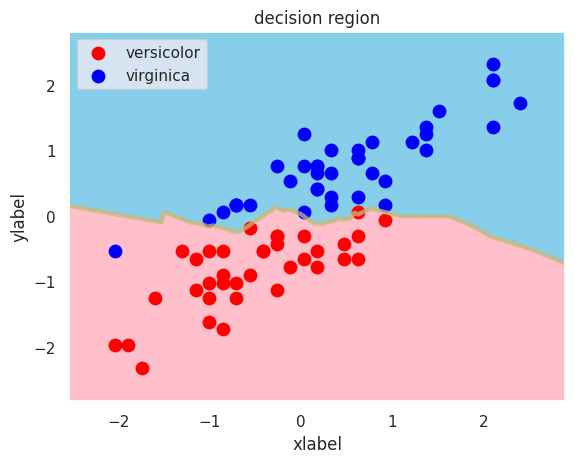

In [73]:
decision_region(X_train_trans, y_train, neigh5)

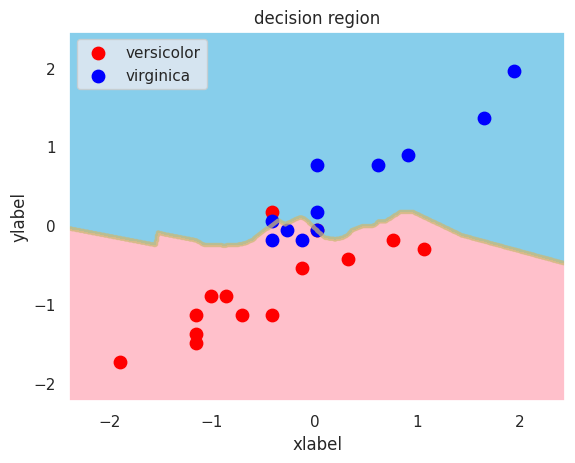

In [74]:
decision_region(X_test_trans, y_test, neigh3)


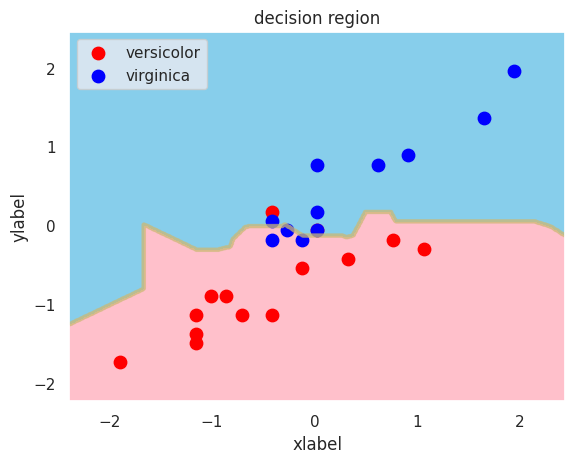

In [75]:
decision_region(X_test_trans, y_test, neigh1)


In [76]:
from sklearn.metrics import *

def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test, predict)
    rec_score = recall_score(test, predict)
    f_score = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print('Accuracy : {:.3f}'.format(acc_score))
    print('Precision: {:.3f}'.format(prec_score))
    print('Recall   : {:.3f}'.format(rec_score))
    print('F        : {:.3f}'.format(f_score))
    print('Confusion matrix:\n', conf_matrix)
     

In [77]:

from sklearn.linear_model import *

logregression = LogisticRegression()
logregression.fit(X_train_trans, y_train)
log_predict = logregression.predict(X_test_trans)
result_log = pd.DataFrame([log_predict, y_test], index=['Predict', 'Actual value'])
result_log

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,1,1,1,2,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [78]:
evaluation(y_test, log_predict)


Accuracy : 0.840
Precision: 0.857
Recall   : 0.857
F        : 0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


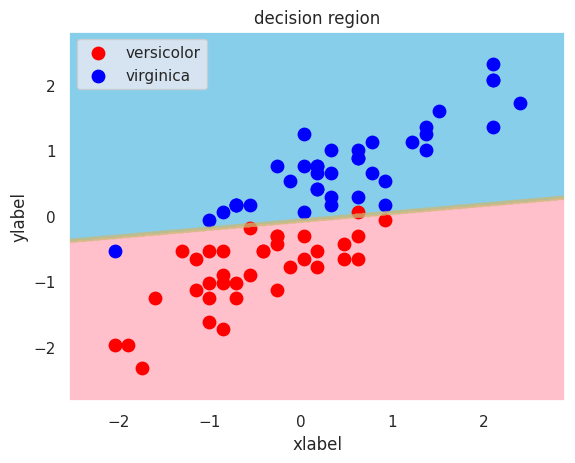

In [79]:
decision_region(X_train_trans, y_train, logregression)


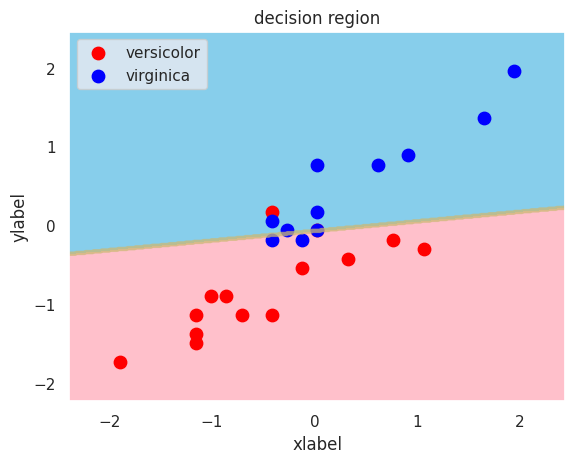

In [80]:
decision_region(X_test_trans, y_test, logregression)


In [81]:

from sklearn.svm import *
from sklearn.pipeline import make_pipeline
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_trans, y_train)
svm_predict = svm.predict(X_test_trans)
result_svm = pd.DataFrame([svm_predict, y_test], index=['Predict', 'Actual value'])
result_svm

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,1,1,1,2,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [82]:
evaluation(y_test, svm_predict)


Accuracy : 0.840
Precision: 0.857
Recall   : 0.857
F        : 0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


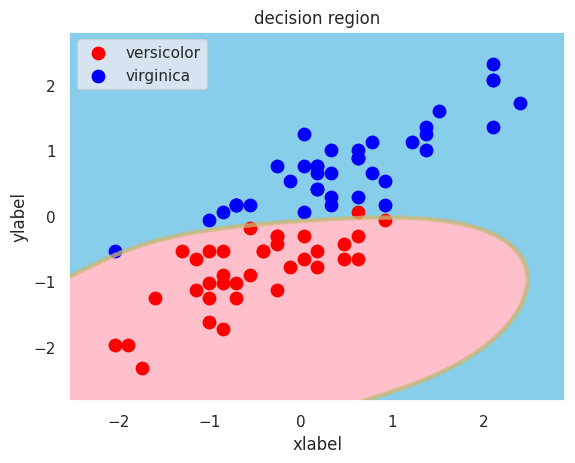

In [83]:
decision_region(X_train_trans, y_train, svm)


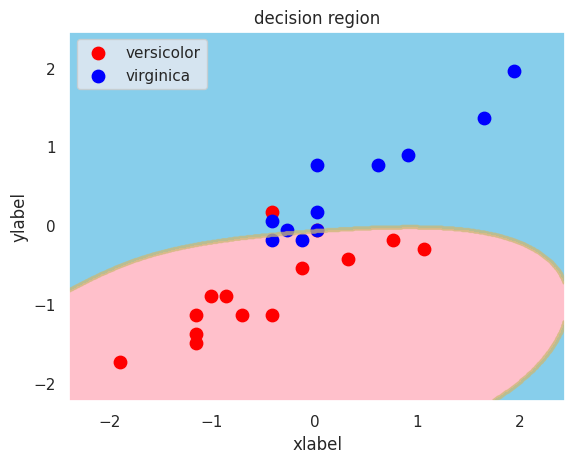

In [84]:
decision_region(X_test_trans, y_test, svm)

In [85]:
from sklearn.tree import *

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_trans, y_train)
detree_predict = decisiontree.predict(X_test_trans)
result_tree = pd.DataFrame([detree_predict, y_test], index=['Predict', 'Actual value'])
result_tree

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,1,1,1,1,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [86]:
evaluation(y_test, detree_predict)

Accuracy : 0.840
Precision: 0.812
Recall   : 0.929
F        : 0.867
Confusion matrix:
 [[13  1]
 [ 3  8]]


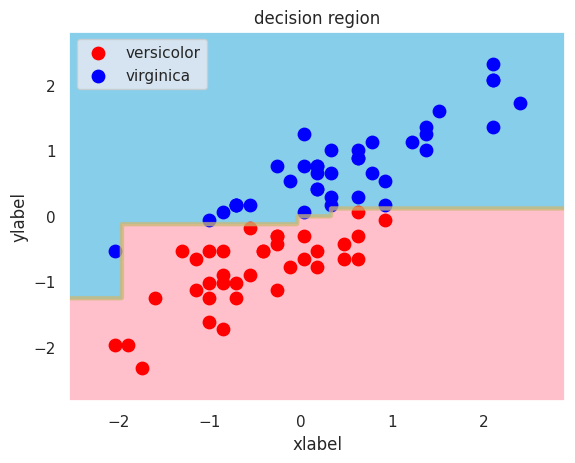

In [87]:
decision_region(X_train_trans, y_train, decisiontree)


In [88]:
from sklearn.ensemble import *

randomforest = RandomForestClassifier()
randomforest.fit(X_train_trans, y_train)
rafo_predict = randomforest.predict(X_test_trans)
result_rafo = pd.DataFrame([rafo_predict, y_test], index=['Predict', 'Actual value'])
result_rafo
     

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,1,1,1,1,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [89]:
evaluation(y_test, rafo_predict)


Accuracy : 0.840
Precision: 0.812
Recall   : 0.929
F        : 0.867
Confusion matrix:
 [[13  1]
 [ 3  8]]


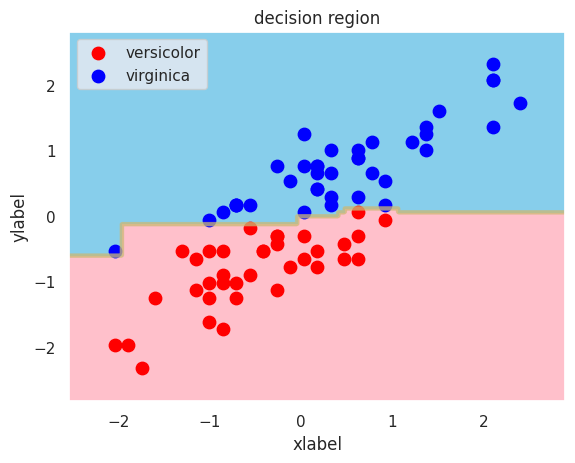

In [90]:
decision_region(X_train_trans, y_train, randomforest)

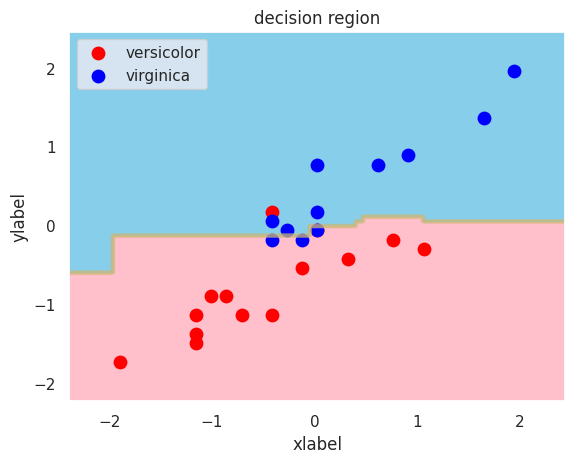

In [91]:
decision_region(X_test_trans, y_test, randomforest)

In [92]:
k_neigh_3 = KNeighborsClassifier(n_neighbors=3)
k_neigh_3.fit(X_train, y_train.ravel())
pred_3 = k_neigh_3.predict(X_test)

evaluation(y_test, predict_3)

Accuracy : 0.800
Precision: 0.800
Recall   : 0.857
F        : 0.828
Confusion matrix:
 [[12  2]
 [ 3  8]]


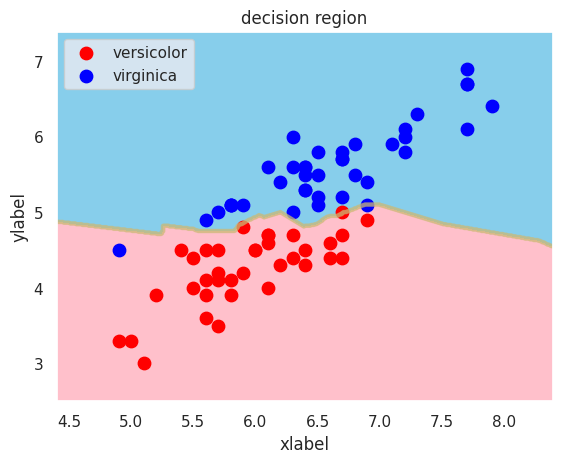

In [93]:
decision_region(X_train, y_train, k_neigh_3)

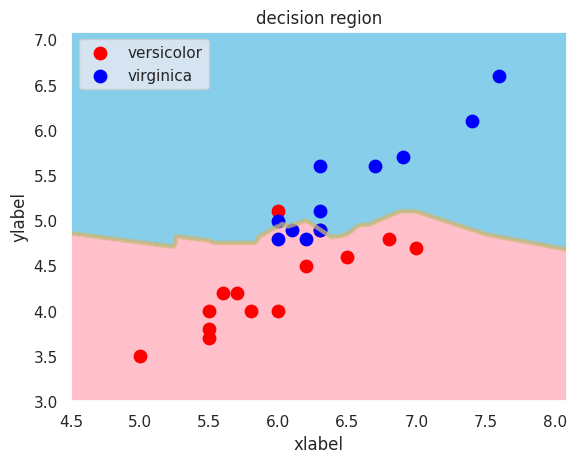

In [94]:
decision_region(X_test, y_test, k_neigh_3)

In [95]:
logregression_unscaled = LogisticRegression()
logregression_unscaled.fit(X_train, y_train)
log_predict_unscaled = logregression_unscaled.predict(X_test)

evaluation(y_test, log_predict_unscaled)

Accuracy : 0.840
Precision: 0.857
Recall   : 0.857
F        : 0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


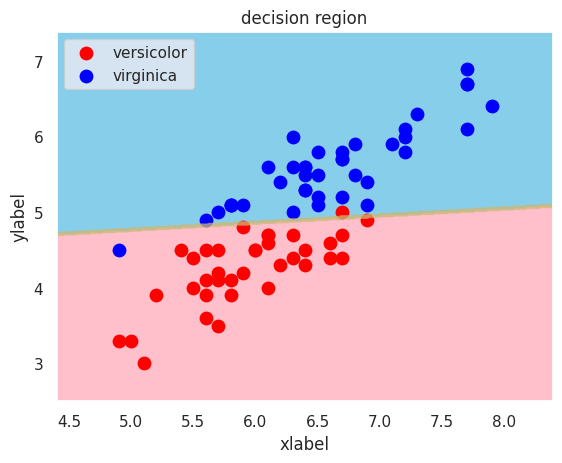

In [96]:
decision_region(X_train, y_train, logregression_unscaled)

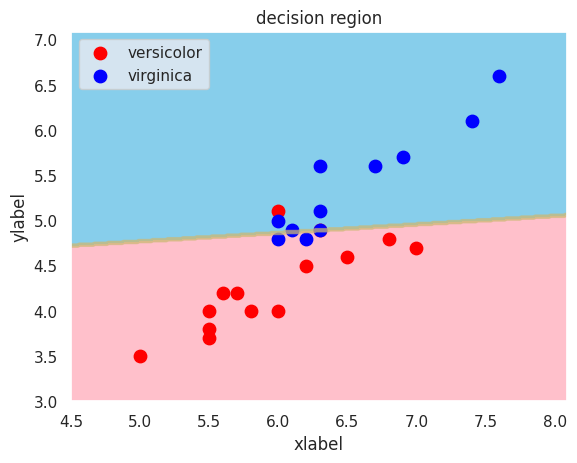

In [97]:
decision_region(X_test, y_test, logregression_unscaled)

In [98]:
svm_unscaled = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_unscaled.fit(X_train, y_train)
svm_predict_unscaled = svm_unscaled.predict(X_test)

evaluation(y_test, svm_predict_unscaled)

Accuracy : 0.840
Precision: 0.857
Recall   : 0.857
F        : 0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


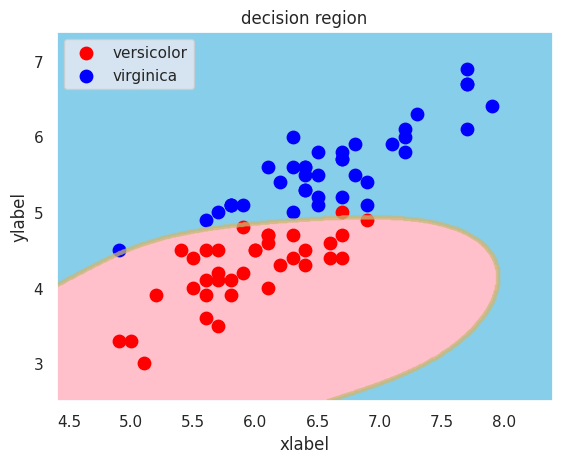

In [99]:
decision_region(X_train, y_train, svm_unscaled)

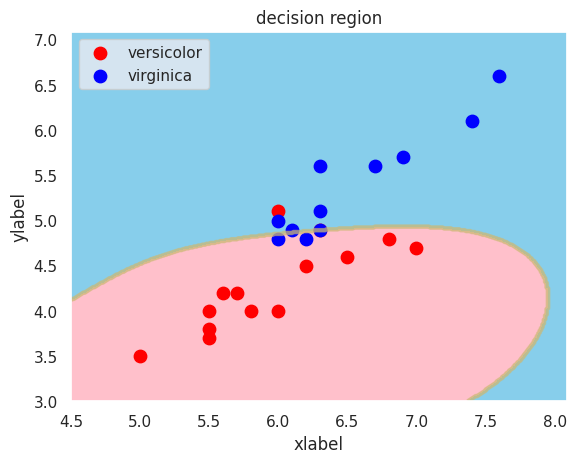

In [100]:
decision_region(X_test, y_test, svm_unscaled)

In [101]:
decisiontree_unscaled = DecisionTreeClassifier()
decisiontree_unscaled.fit(X_train, y_train)
dtree_predict_unscaled = decisiontree_unscaled.predict(X_test)

evaluation(y_test, dtree_predict_unscaled)

Accuracy : 0.840
Precision: 0.812
Recall   : 0.929
F        : 0.867
Confusion matrix:
 [[13  1]
 [ 3  8]]


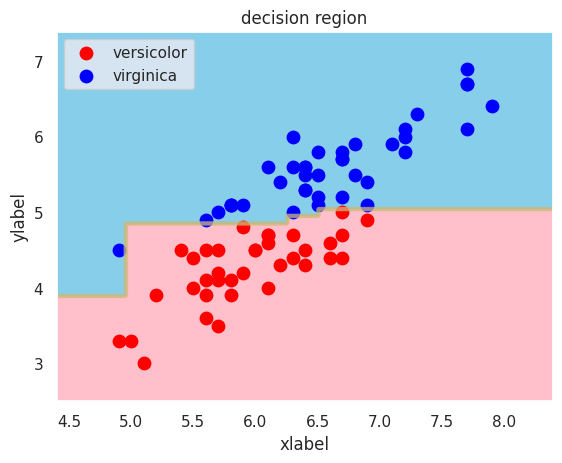

In [102]:
decision_region(X_train, y_train, decisiontree_unscaled)

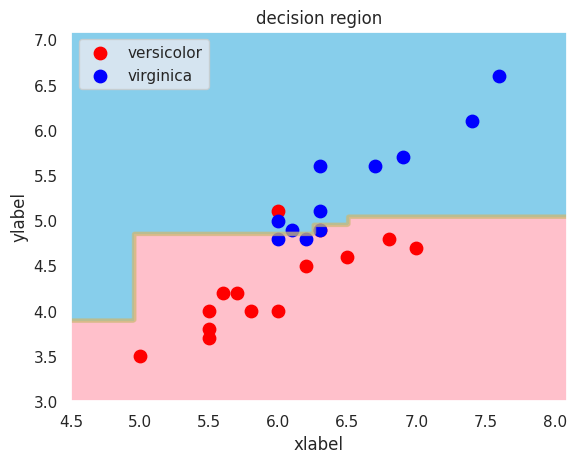

In [103]:
decision_region(X_test, y_test, decisiontree_unscaled)

In [104]:
randomforest_unscaled = RandomForestClassifier()
randomforest_unscaled.fit(X_train, y_train)
randforest_predict_unscaled = randomforest_unscaled.predict(X_test)

evaluation(y_test, randforest_predict_unscaled)

Accuracy : 0.840
Precision: 0.812
Recall   : 0.929
F        : 0.867
Confusion matrix:
 [[13  1]
 [ 3  8]]


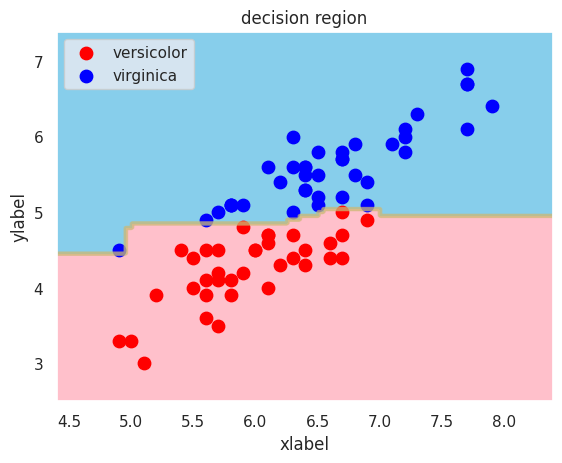

In [105]:
decision_region(X_train, y_train, randomforest_unscaled)

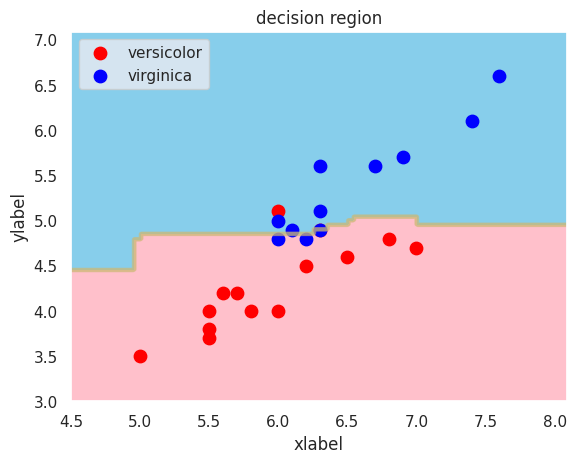

In [106]:
decision_region(X_test, y_test, randomforest_unscaled)

In [110]:

X = pd.DataFrame(data=load_iris().data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.DataFrame(load_iris().target, columns=[('Species')])
df = pd.concat([X, y], axis=1)
df = df[['sepal_length', 'petal_length', 'Species']]
df




,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [114]:

#Convert DataFrame to ndarray
X = df.loc[:, 'sepal_length':'petal_length'].values
y = df.loc[:, 'Species'].values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size=0.75, test_size=0.25)
print(X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape)



(112, 2) (38, 2) (112,) (38,)


In [121]:
scaler3  = StandardScaler()
scaler3.fit(X_train3)
X_train_scaled3 = scaler3.transform(X_train3)
X_test_scaled3 = scaler3.transform(X_test3)

neigh5_3 = KNeighborsClassifier()
neigh5_3.fit(X_train_scaled3, y_train3)
predict_5_3 = neigh5_3.predict(X_test_scaled3)

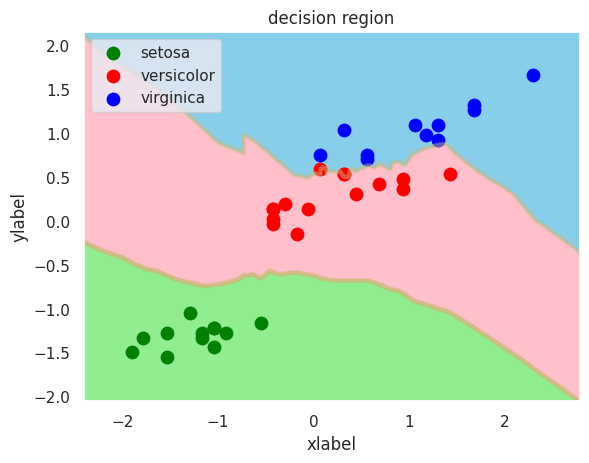

In [116]:
def decision_region_3(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    if len(target_names) == 2:
        scatter_color = ['red', 'blue']
        contourf_color = ['pink', 'skyblue']
        n_class = 2
    elif len(target_names) == 3:
        scatter_color = ['green', 'red', 'blue']
        contourf_color = ['lightgreen', 'pink', 'skyblue']
        n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region_3(X_test_scaled3, y_test3, neigh5_3, target_names=['setosa', 'versicolor', 'virginica'])

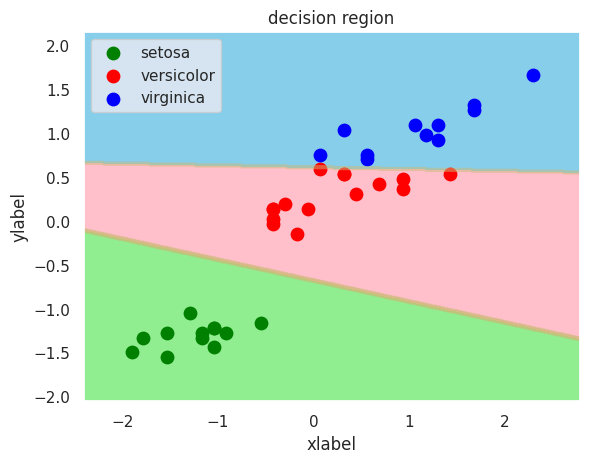

In [117]:
logregression3 = LogisticRegression()
logregression3.fit(X_train_scaled3, y_train3)
log_predict3 = logregression3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, logregression3, target_names=['setosa', 'versicolor', 'virginica'])

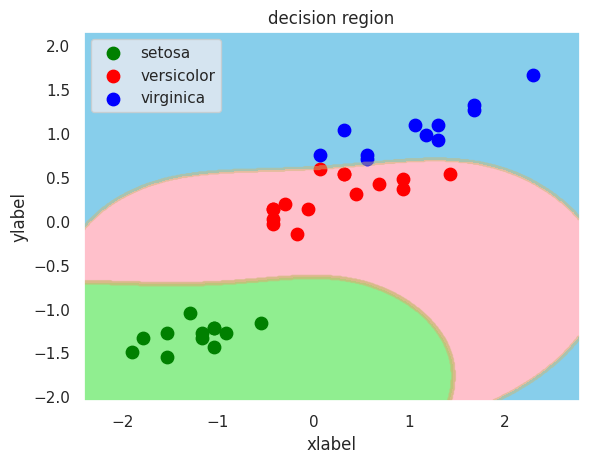

In [118]:
svm3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm3.fit(X_train_scaled3, y_train3)
svm_predict3 = svm3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, svm3, target_names=['setosa', 'versicolor', 'virginica'])

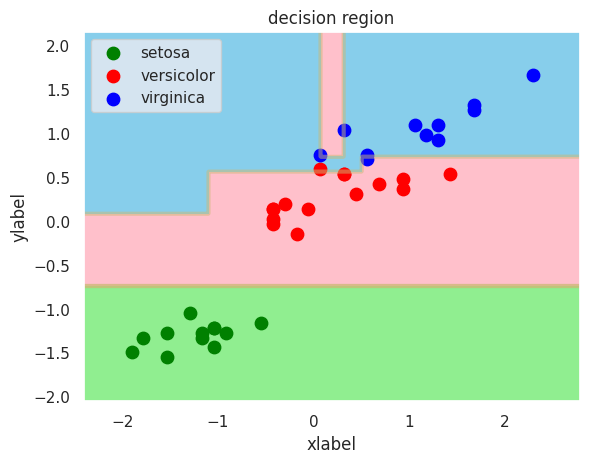

In [119]:
decisiontree3 = DecisionTreeClassifier()
decisiontree3.fit(X_train_scaled3, y_train3)
detree_predict3 = decisiontree3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, decisiontree3, target_names=['setosa', 'versicolor', 'virginica'])

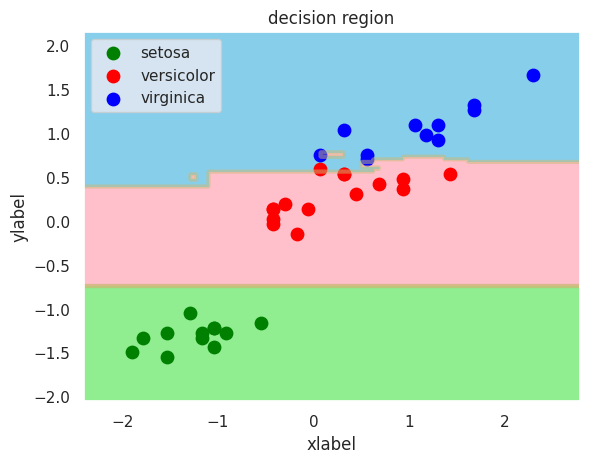

In [120]:
randomforest3 = RandomForestClassifier()
randomforest3.fit(X_train_scaled3, y_train3)
rafo_predict3 = randomforest3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, randomforest3, target_names=['setosa', 'versicolor', 'virginica'])